# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

В данном исследовании мы будем изучать влияние различных параметров на стоимость недвижимости. Нам предстоит:

1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Для каждого параметра построить гистограммы. 
2. Изучить время продажи квартиры. Построить гистограмму и посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? 
3. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
3. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
4. Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.
5. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

## Изучение данных из файла

Описание данных
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

Без знака табуляции значения в таблице отображаются в одну строку, поэтому добавим аргумент sep='\t

In [2]:
estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
estate_data[:10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Исходя из информаци по нашей таблице мы можем видеть пропущенные значения в столбцах `ceiling_height, floors_total, living_area, is_apartment` (в этом столбце булевы значения), `kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition`

### Вывод

В таблице 22 столбца и 23699 строк. По названиям колонок мы видим, что в датасете указананы характеристики квартир и их расположение относительно водоемов, парков и т.п. Пропуски в высоте потолков, размерах жилой площади и кухни могли быть не указаны в объявлении, поэтому будем использовать средние значения либо медианы.

* `ceiling_height` - пропущенные значения вероятно от того, что владельцы недвижимости не знают высоту своих потолков, либо ошибка в выгрузке данных. Для использования данных в этом столбце будем использовать средние значения высоты потолков относительно местонахождения недвижимости. 
* `floors_total` - данные могут отсутствать в связи с тем, что при заполнении была пропущена данная характеристика, либо в здании один этаж, что вполне допустимо, исходя из количества пропущенных значений в этом столбце. 
* `living_area` - пропущенные значения могут быть из-за затруднений с подсчетом жилой площади, т.к. существуют нормативы к определению, какая площадь в квартире будет называться жилой, и также многие покупатели смотрят на общую площадь недвижимости.
* `is_apartment` - стоит отметить, что в столбце булевы значения, поэтому пропуски в нём мы заменим на False, т.к. можно предположить, что значения были пропущены в связи с тем, что владельцы квартир не знают, является ли их квартира аппартаментом, но на практике владельцы аппартаментов в курсе особенности их недвижимости.
* `kitchen_area` - также присутствуют пропущенные значения, это может быть связано с тем, что были затруднения с замером помещения, также есть вероятность, что в квартирах, где пропущены значения, кухня объединена с гостиной, и что также вызвало затруднения при заполнении информации. 
* `balcony` - пропущенные значения могут означать, что в квартирах отсутствует балкон, т.к. в этом столбце указано количество балконов;
* `locality_name` - пропущены названия населённых пунктов. Мы знаем, что в датасете у нас недвижимость из Санкт-Петербурга, поэтому мы будем учитывать это при замене пропущенных значений.
* `airports_nearest` -  указаны пропущенные значения, т.к. вероятно продавец не знает расстояние до аэропорта, либо это ошибка выгрузки данных. 
* `cityCenters_nearest` - возможно продавцы не знают удалённость своей квартиры от центра, либо здесь также ошибка выгрузки данных. В названии столбца есть нарушения змеиного регистра, в дальнейшем мы изменим его название на `distance_to_center`.
* `parks_around3000`, `ponds_around3000` - значения не являются обязательными при заполнении, я думаю, что замену пропущенных значений в данных колонках можно пропустить. Для удобста, в случае использования данных в этих столбцах, мы изменим их название на `parks_around` и `ponds_around` соответственно. 
* `parks_nearest`, `ponds_nearest` - возможно, также имеет место быть ошибка выгрузки. У нас есть достаточное количество заполненных значений, которые помогут нам рассчитать возможные корреляции, если они будут;
* `days_exposition` - в этом столбце сложно рассчитать среднее или медиану, т.к. мы можем только предполагать, сколько объявление было актуально, и когда совершена сделка. Поэтому пропущенные значения здесь мы заменять не будем. 

## Предобработка данных

Необходимо обработать данные перед тем, как приступить к расчетам. Для начала приведем названия столбцов к удобному виду: 

In [4]:
estate_data = estate_data.rename(
    columns={'cityCenters_nearest': 'distance_to_center', 
             'parks_around3000': 'parks_around', 
             'ponds_around3000': 'ponds_around'}
)

In [5]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы успешно изменили названия столбцов, теперь можем приступать к работе с пропусками. Для этого сделаем наглядную таблицу, которая покажет нам процент пропусков в каждой колонке. Это поможет нам оптимально оценить, какие пропуски нам нужно точно оставить либо заменить, а какие можно удалить. 

In [6]:
na_ratio = pd.DataFrame(estate_data.isna().mean()).reset_index()
na_ratio.set_axis(['column_name', 'na_ratio'], axis = 'columns', inplace = True)
na_ratio.sort_values(by='na_ratio', ascending=False).style.format({'na_ratio': '{:,.1%}'.format})

,column_name,na_ratio
9,is_apartment,88.3%
18,parks_nearest,65.9%
20,ponds_nearest,61.6%
13,balcony,48.6%
5,ceiling_height,38.8%
15,airports_nearest,23.4%
16,distance_to_center,23.3%
19,ponds_around,23.3%
17,parks_around,23.3%
21,days_exposition,13.4%


Согласно таблице, мы можем удалить пропущенные значения в столбцах `floors_total` и `locality_name`, со всеми остальными столбцами нужно будет поработать, по мере необходимости заменяя пропущенные значения. Для начала удалим пропущенные значения в вышеперечисленных столбцах:

In [7]:
estate_data = estate_data.dropna(subset=['locality_name','floors_total'])

Теперь можно приступать к работе со столбцами. Столбец `is_apartment` хранит в себе булевы значения, согласно которым можно понять, является ли продаваемая недвижимость аппартаментами или нет. Как правило, владельцы аппартаментов еще на этапе заключения договора купли-продажи осведомлены о данной особенности, поэтому будем считать, что пропущенные значения False - аппартаментами не является. Для начала проверим, нет ли в нашем столбце каких-либо неожиданных значений, а после этого заменим пропуски. 

In [8]:
estate_data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Как и ожидалось, есть значения nan, True, False. Заменим все пропуски на False и сразу проверим результат:

In [9]:
estate_data['is_apartment']=estate_data['is_apartment'].fillna(False)
estate_data['is_apartment'].unique()

array([False,  True])

Посмотрим на колонки с наличием парков и прудов возле дома и в радиусе трёх километров(`parks_nearest, ponds_nearest, parks_around, ponds_around`). Также много пропущенных значений. Т.к. этот параметр достаточно важен для общей характеристики, то мы будем заполнять все пропущенные значения медианными, т.к. так или иначе парки или пруды присутсвуют в районах проживания, даже если жилой комплекс построен "в поле", номинально можно считать, что парк уже есть :)

Средняя высота потолков в Санкт-Петербурге (`ceiling_height`) составляет 2,7 метров, и как правило, для покупателя высота потолков не основополагающий фактор при выборе квартиры, поэтому значения высоты потолков мы также заменим медианными значениями в данном столбце. Также проверим на выбросы столбец со значениями высоты потолков, чтобы понять, есть ли ошибки ввода (человеческий фактор, например, вместо 3.0 введено 30 и т.п.) и также заменим такие выбросы на медианы.

Посмотрим на колонку удалённости от центра (`distance_to_center`). Здесь тоже есть пропущенные значения, и также мы их заменим медианными, т.к. транспортная сеть в Санкт-Петербурге развита достаточно хорошо, и можно полагаться на возможность быстро добраться до центра из любой точки города на метро и/или наземном траспорте. По такому же принципу мы заменим пропущенные значения удаленности от аэропорта (`airports_nearest`).

Название локации (`locality_name`) - оставим пропуски без изменений, т.к. здесь предполагать очень сложно.

In [10]:
median_added = [
    'parks_nearest',
    'ponds_nearest',
    'parks_around',
    'ponds_around',
    'ceiling_height',
    'distance_to_center',
    'airports_nearest'
               ]
for value in median_added:
    estate_data[value] = estate_data[value].fillna(estate_data[value].median())

Количество дней размещения (`days_exposition`) объявления мы заменим на 0, т.к. тоже довольно сложно предположить, как долго объявление было размещено. 

Количество балконов (`balcony`) также заменим на 0, т.к. если мы добавим среднее или медианное значение, а по факту балкона в квартире нет, то это может негативно сказаться на дальнейшей продаже потенциальному покупателю. 

In [11]:
zero_added = [
    'days_exposition',
    'balcony'
               ]
for value in zero_added:
    estate_data[value] = estate_data[value].fillna(0)

Пропущенные значения в этажности (`floors_total`) лучше не игнорировать, поэтому мы сгруппируем их по количеству этажей и заполним медианными значениями, соответствующими каждой группе 

In [12]:
def floor_category(row):
    if row.floor <= 9:
        return 'малоэтажная застройка'
    elif  9 < row.floor <= 20:
        return  'многоэтажная застройка'
    else:
        return 'небоскрёб'

estate_data['floor_category'] = estate_data.apply(floor_category, axis=1)

Пропуски в столбце с жилой площадью (`living_area`) мы обработаем исходя из количества комнат (не вся площадь в квартире будут считается жилой), в пропуске в столбце с площадью кухни (`kitchen_area`) мы заменим на медианные значения исходя из общей площади квартиры. 

In [13]:
def total_area_category(row):
    if row['total_area'] <= 35:
        return 'малая площадь'
    elif row['total_area'] > 35 and row['total_area'] <= 70:
        return 'средняя площадь'
    else:
        return 'большая площадь'
    
estate_data['total_area_category'] = estate_data.apply(total_area_category, axis=1)

In [14]:
estate_data['floors_total'] = estate_data.groupby('floor_category')['floors_total'].apply(lambda x: x.fillna(x.median()))
estate_data['living_area'] = estate_data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))
estate_data['kitchen_area'] = estate_data.groupby('total_area_category')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
estate_data['ceiling_height'] = estate_data.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

Создадим столбец с категориями удалённости от центра (`distance_category`) - напишем функцию и рассортируем данные для удобства расчетов. 

In [15]:
def distance_info(row):
    if row['distance_to_center'] <= 5000:
        return 'центр города'
    elif row['distance_to_center'] < 15000:
        return 'близко к центру'
    elif row['distance_to_center'] >= 15000:
        return 'далеко от центра'

In [16]:
estate_data['distance_category'] = estate_data.apply(distance_info, axis=1)

In [17]:
estate_data[:10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,distance_to_center,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,total_area_category,distance_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,малоэтажная застройка,большая площадь,далеко от центра
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,малоэтажная застройка,средняя площадь,далеко от центра
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,малоэтажная застройка,средняя площадь,близко к центру
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,45.00,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,малоэтажная застройка,большая площадь,близко к центру
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,многоэтажная застройка,большая площадь,близко к центру
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,26757.0,13096.5,0.0,455.0,1.0,503.0,55.0,малоэтажная застройка,малая площадь,близко к центру
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,...,52996.0,19143.0,0.0,455.0,0.0,503.0,155.0,малоэтажная застройка,средняя площадь,далеко от центра
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.50,22,False,...,23982.0,11634.0,0.0,455.0,0.0,503.0,0.0,небоскрёб,большая площадь,близко к центру
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,26757.0,13096.5,0.0,455.0,1.0,503.0,189.0,небоскрёб,малая площадь,близко к центру
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,50898.0,15008.0,0.0,455.0,0.0,503.0,289.0,малоэтажная застройка,средняя площадь,далеко от центра


Все пропущенные значения заменены на подходящие по типу. Изменим типы данных столбцах на целочисленные, т.к. данные в них количественные и для более наглядного отображения: `last_price`, `floors_total`, `balcony`, `days_exposition`, `parks_around`, `ponds_around`.
Поменяем формат отображения даты в колонке `first_day_exposition`, т.к. отображение времени нам не нужно и затрудняет чтение данных. 

In [18]:
estate_data['last_price'] = estate_data['last_price'].astype('int')
estate_data['floors_total'] = estate_data['floors_total'].astype('int')
estate_data['balcony'] = estate_data['balcony'].astype('int')
estate_data['days_exposition'] = estate_data['days_exposition'].astype('int')
estate_data['parks_around'] = estate_data['parks_around'].astype('int')
estate_data['ponds_around'] = estate_data['ponds_around'].astype('int')

In [19]:
estate_data['first_day_exposition'] = pd.to_datetime(
    estate_data['first_day_exposition'], format='%Y-%m-%d')

Проверим наши результаты после изменений:

In [20]:
estate_data[:10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,distance_to_center,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,total_area_category,distance_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,0,малоэтажная застройка,большая площадь,далеко от центра
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,12817.0,18603.0,0,455.0,0,503.0,81,малоэтажная застройка,средняя площадь,далеко от центра
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,малоэтажная застройка,средняя площадь,близко к центру
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424,малоэтажная застройка,большая площадь,близко к центру
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,многоэтажная застройка,большая площадь,близко к центру
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,26757.0,13096.5,0,455.0,1,503.0,55,малоэтажная застройка,малая площадь,близко к центру
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,52996.0,19143.0,0,455.0,0,503.0,155,малоэтажная застройка,средняя площадь,далеко от центра
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,23982.0,11634.0,0,455.0,0,503.0,0,небоскрёб,большая площадь,близко к центру
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,26757.0,13096.5,0,455.0,1,503.0,189,небоскрёб,малая площадь,близко к центру
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,50898.0,15008.0,0,455.0,0,503.0,289,малоэтажная застройка,средняя площадь,далеко от центра


Мы можем видеть обработанные данные без пропусков, наглядно отображающие информацию. На этом мы можем завершить этап предобработки данных. 

## Расчёты и добавление результатов в таблицу

Добавим в нашу таблицу колонки со следующей информацией:

* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Пойдем по порядку, добавляя столбцы. Чтобы посчитать цену за квадратный метр, нам нужно найти отношение общей стоимость недвижимости к общей площади и округлим стоимость до двух данных после точки(копейки у нас не в особом ходу).

In [21]:
estate_data['price_per_meter'] = estate_data['last_price'] / estate_data['total_area']
estate_data['price_per_meter'] = round(estate_data['price_per_meter'], 2)

Убедимся, что столбец отображает суммы корректно:

In [22]:
estate_data['price_per_meter'][:10].to_frame()

,price_per_meter
0,120370.37
1,82920.79
2,92785.71
3,408176.10
4,100000.00
5,95065.79
6,99195.71
7,110544.69
8,87454.76
9,88524.59


Столбец добавлен в таблицу, данные отображаются корректно. 

Теперь сделаем три столбца: первый - с днями недели, второй - с месяцами, третий - с годами. Можно использовать обозначения цифрами (номер дня недели, номер месяца), но мы возьмем словесные обозначения для простоты восприятия данных:

In [23]:
estate_data['week_day'] = estate_data['first_day_exposition'].dt.weekday
estate_data['month'] = estate_data['first_day_exposition'].dt.month
estate_data['year'] = estate_data['first_day_exposition'].dt.year

Проверим результаты:

In [24]:
estate_data[['week_day', 'month', 'year']][:10]

,week_day,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018
5,0,9,2018
6,3,11,2017
7,3,4,2019
8,2,5,2018
9,6,2,2017


Теперь сгруппируем данные по этажам. Ранее мы писали функцию, в которой делили этажность домов на группы (малоэтажки, многоэтажки и небоскрёбы). Теперь же разделим на группы квартиры, которые находятся на первом и последнем этаже. Недвижимость, которая не подходит под эти два параметра этажа, отнесём к категории "другой".  Напишем и сразу применим нашу функцию:

In [25]:
def floor_number(row):
    if row.floor == 1:
        return 'первый'
    elif row.floor == row.floors_total:
        return  'последний'
    else:
        return 'другой'
estate_data['floor_number'] = estate_data.apply(floor_number, axis=1)

Проверим, что получилось:

In [26]:
estate_data[['floor','floor_number','floors_total']][:10]

,floor,floor_number,floors_total
0,8,другой,16
1,1,первый,11
2,4,другой,5
3,9,другой,14
4,13,другой,14
5,5,другой,12
6,6,другой,26
7,22,другой,24
8,26,другой,27
9,7,другой,9


Теперь найдем соотношение жилой и общей площади, а также отношение площади кухни к общей. Эти данные помогут нам понять, сколько полезного пространства есть в квартире, а полезность пространства для каждого покупателя своя. Отображение долей оставим в десятичных дробях, оставим 2 знака после точки, в проценты переводить не будем, для удобства расчетов. 

In [27]:
estate_data['living_area_ratio'] = estate_data['living_area'] / estate_data['total_area']
estate_data['living_area_ratio'] = round(estate_data['living_area_ratio'], 2)
estate_data['kitchen_area_ratio'] = estate_data['kitchen_area'] /estate_data['total_area']
estate_data['kitchen_area_ratio'] = round(estate_data['kitchen_area_ratio'], 2)

Проверим, что у нас получилось:

In [28]:
estate_data[['living_area','kitchen_area','total_area', 'living_area_ratio', 'kitchen_area_ratio']][:10]

,living_area,kitchen_area,total_area,living_area_ratio,kitchen_area_ratio
0,51.00,25.00,108.00,0.47,0.23
1,18.60,11.00,40.40,0.46,0.27
2,34.30,8.30,56.00,0.61,0.15
3,45.00,13.00,159.00,0.28,0.08
4,32.00,41.00,100.00,0.32,0.41
5,14.40,9.10,30.40,0.47,0.30
6,10.60,14.40,37.30,0.28,0.39
7,30.50,18.90,71.60,0.43,0.26
8,15.43,8.81,33.16,0.47,0.27
9,43.60,6.50,61.00,0.71,0.11


Все требуемые расчеты сделаны и данные добавлены. Теперь мы можем приступать к исследовательскому анализу данных. 

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

**1. Гистограмма, отображающая количество объявлений по величине площади квартир.**

Text(0, 0.5, 'количество объявлений')

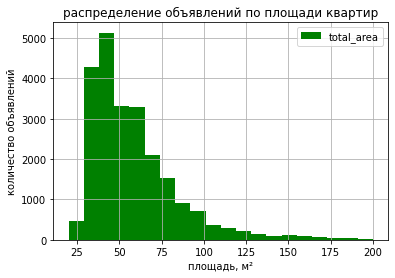

In [29]:
estate_data.plot(kind='hist', y ='total_area', grid=True, bins=20, range=(20, 200), color = ['green'])
plt.title('распределение объявлений по площади квартир') 
plt.xlabel('площадь, м²')
plt.ylabel('количество объявлений')

Мы видим нормальное распределение объявлений по площади квартир. Согласно гистограмме, в продаже преобладают квартиры метражом от 28м² до 62м².

**2. Гистограмма, отображающая количество объявлений по ценам квартир.** Т.к. нам необходимо наглядно показать распределение на небольшом пространстве, мы возведем наш столбец в -6 степень, а в обозначении будем учитывать млн.рублей.

Text(0, 0.5, 'количество объявлений')

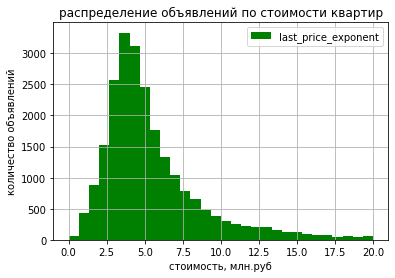

In [30]:
estate_data['last_price_exponent'] = estate_data['last_price'] * 1e-6
estate_data.plot(kind='hist', y ='last_price_exponent', grid=True, bins=30, range=(0, 20), color = ['green'])
plt.title('распределение объявлений по стоимости квартир')
plt.xlabel('стоимость, млн.руб')
plt.ylabel('количество объявлений')

В нашей гистограмме мы также наблюдаем нормальное распределение, и видим, что в продаже преобладают квартиры стоимостью от 2.6 млн.руб. до 5.2 млн.руб. Исходя из стоимости, можно предположить, что это студии, 1-комнатные и 2-комнатные квартиры в спальных районах.

**3. Гистограмма, отображающая количество объявлений по количеству комнат в квартирах.**

Text(0, 0.5, 'количество объявлений')

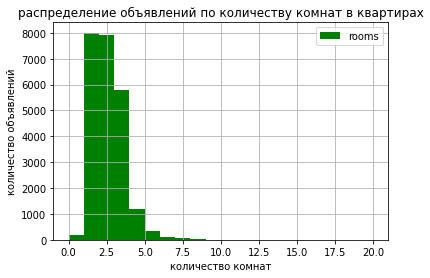

In [31]:
estate_data.plot(kind='hist', y ='rooms', grid=True, bins=20, range=(0, 20), color = ['green'])
plt.title('распределение объявлений по количеству комнат в квартирах') 
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')

В этой гистограмме мы также можем видеть нормальное распределение, есть выброс, который может быть как ошибкой, так и существующей многокомнатной квартирой (дуплекс, либо дуос (когда продают несколько квартир, которые подразумевают под собой объединение в одну). В объявлениях о продаже преобладают квартиры-студии, 1-2-3-комнатные квартиры.

**4. Гистограмма, отображающая количество объявлений по высоте потолков в квартирах.**

Text(0, 0.5, 'количество объявлений')

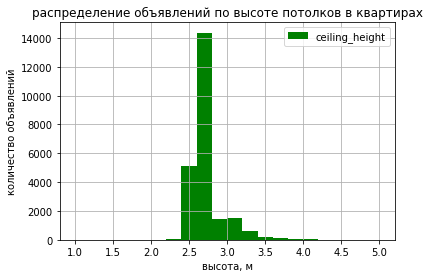

In [32]:
estate_data.plot(kind='hist', y ='ceiling_height', grid=True, bins=20, range=(1, 5), color = ['green'])
plt.title('распределение объявлений по высоте потолков в квартирах')
plt.xlabel('высота, м')
plt.ylabel('количество объявлений')

Здесь мы можем видеть, что в продаже преобладают квартиры со стандартной высотой птолков - 2.7 метра. Также у нас есть выброс, посмотрим, что покажет описание нашего столбца: 

In [33]:
estate_data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Можно заметить максимальное значение, равное 100. Достаточно высоко, возможно, здесь есть опечатка или ошибка в выгрузке данных. В любом случае, здесь можно оставить это значение, а потом уточнить у риелтора либо собственника информацию о высоте потолков.  

### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Посмотрим, какого рода данные у нас есть относительно времени продажи квартир. У нас есть дата публикации объявление и количество дней в продаже. Для того, чтобы наглядно посмотреть информацию по времени продажи квартиры, построим гистограмму. 

In [34]:
estate_data[['first_day_exposition', 'week_day', 'month', 'year', 'days_exposition']][:30]

,first_day_exposition,week_day,month,year,days_exposition
0,2019-03-07,3,3,2019,0
1,2018-12-04,1,12,2018,81
2,2015-08-20,3,8,2015,558
3,2015-07-24,4,7,2015,424
4,2018-06-19,1,6,2018,121
5,2018-09-10,0,9,2018,55
6,2017-11-02,3,11,2017,155
7,2019-04-18,3,4,2019,0
8,2018-05-23,2,5,2018,189
9,2017-02-26,6,2,2017,289


Text(0, 0.5, 'количество объявлений')

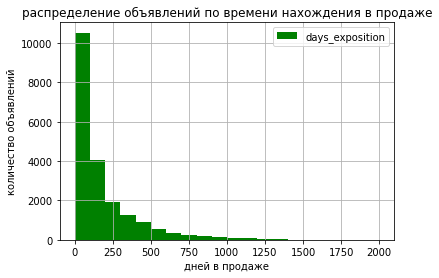

In [35]:
estate_data.plot(kind='hist', y ='days_exposition', grid=True, bins=20, range=(1, 2000), color = ['green'])
plt.title('распределение объявлений по времени нахождения в продаже')
plt.xlabel('дней в продаже')
plt.ylabel('количество объявлений')

Согласно гистограмме мы видим, что в основном квартиры продаются достаточно быстро - в течение первых 3х-5ти месяцев от начала публикации. Средняя длительность проджи в районе 6-8 месяцев, всё что дольше - уже нужно смотреть адресно, что можно изменить, добавить в объявлении либо в характеристиках самой недвижимости для быстрой продажи. Можно заметить откровенно большие цифры дней в продаже, посмотрим описание к столбцу и сразу рассчитаем медиану для сравнения:

In [36]:
estate_data['days_exposition'].describe()

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [37]:
estate_data['days_exposition'].median()

73.0

В среднем продажа недвижимости занимает 156 дней (около 5 месяцев) против медианного значения в 73 дня (достаточно быстро). Разница между среднем и медианным значениями достаточно большая, что говорит о выбросах значений. В описании мы можем видеть максимальное значение, равное 1580. Это без малого 4 года. Отсортируем датафрейм по этому значению и посмотрим на характеристики недвижимости:

In [38]:
estate_data.sort_values('days_exposition', ascending=False)[:10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_category,distance_category,price_per_meter,week_day,month,year,floor_number,living_area_ratio,kitchen_area_ratio,last_price_exponent
18843,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,False,...,средняя площадь,близко к центру,72614.11,0,12,2014,другой,0.57,0.16,3.500000
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,...,большая площадь,центр города,364076.78,1,12,2014,другой,0.61,0.21,34.878556
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,большая площадь,далеко от центра,132500.00,1,12,2014,другой,0.55,0.19,10.600000
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,большая площадь,близко к центру,167085.43,1,12,2014,другой,0.54,0.23,13.300000
20969,18,13300000,133.00,2015-02-11,4,3.00,5,58.00,2,False,...,большая площадь,близко к центру,100000.00,2,2,2015,другой,0.44,0.34,13.300000
6691,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,False,...,средняя площадь,далеко от центра,102373.20,4,12,2014,первый,0.44,0.26,4.400000
14093,7,9500000,100.00,2015-02-19,4,3.00,5,76.00,5,False,...,большая площадь,центр города,95000.00,3,2,2015,последний,0.76,0.10,9.500000
15313,1,9278000,139.80,2014-12-28,4,2.80,5,63.65,4,False,...,большая площадь,далеко от центра,66366.24,6,12,2014,другой,0.46,0.09,9.278000
19123,9,5990000,82.00,2015-02-19,3,3.00,4,60.00,2,False,...,большая площадь,далеко от центра,73048.78,3,2,2015,другой,0.73,0.10,5.990000
11955,4,11400000,76.00,2014-12-09,2,2.65,9,36.00,3,False,...,большая площадь,близко к центру,150000.00,1,12,2014,другой,0.47,0.18,11.400000


Исходя из информации в нашем датасете можно предположить, что продаваемая недвижимость в старом фонде или, например, требует капитального ремонта. Либо квартира уже была продана, но объявление по каким-то причинам не снято с публикации. Возможно, стоит уточнить у риелтора либо у собственника по контактным данным в объявлении. 

### Уберём редкие и выбивающиеся значения и посмотрим, какие особенности обнаружили.

Почти во всех характеристиках есть выбросы. Рассмотрим те, на которые потенциальные покупатели будут чаще всего обращать внимание, и на совокупности этих характеристик будут принимать решение о покупке: 
* стоимость
* общая площадь квартиры
* количество комнат
* жилая площадь 
* площадь кухни

#### Посмотрим, как обстоят дела со стоимостью квартир. Ранее мы добавили столбец, в котором уменьшили количество нулей в цене, используем его, чтобы построить диаграмму размаха:

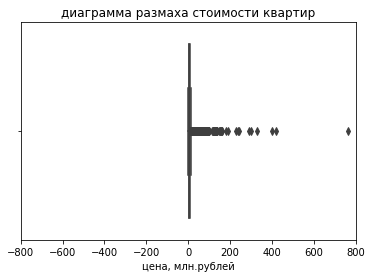

In [39]:
sns.boxplot(x=estate_data['last_price_exponent'])
plt.title('диаграмма размаха стоимости квартир')
plt.xlabel('цена, млн.рублей')
plt.xlim(-800, 800);

Не очень наглядно для описания распределений, но зато видны выбросы. Посмотрим описание столбца и сразу найдем медиану для равнения:

In [40]:
estate_data['last_price_exponent'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_exponent, dtype: float64

In [41]:
estate_data['last_price_exponent'].median()

4.646

Чуть выше мы строили гисторамму распределения объявлений по стоимости квартир, также там указывали среднее значение цены недвижимости. Есть значительная разница между медианным и средним значением. Проверим, существует ли корреляция между общей площадью квартиры и ценой, и между удалённостью от центра и ценой.

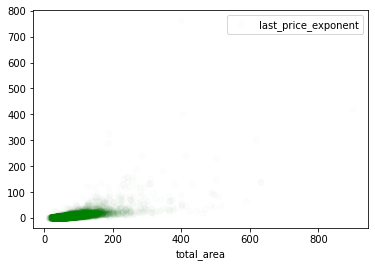

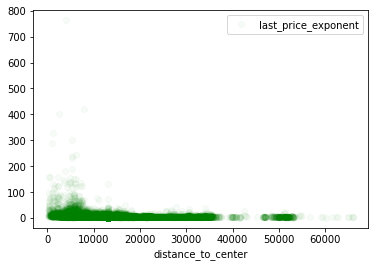

In [42]:
estate_data.plot(x='total_area', y='last_price_exponent', style='o', color = ['green'],  alpha=0.01)
plt.show()
estate_data.plot(x='distance_to_center', y='last_price_exponent', style='o', color = ['green'],  alpha=0.03)
plt.show()

По нашим диаграммам мы можем видеть, что чем ближе к центру, тем дороже недвижимость, а также, чем больше площадь, тем дороже. Проверим соответсвие характеристик недвижимости в нашей таблице. Создадим таблицу с данными выше и сохраним её в переменную price_corr. Отсортируем значения по столбцу с ценой и посмотрим, что получилось. 

In [43]:
price_corr = estate_data[['total_area','distance_to_center','last_price_exponent', 'last_price']].reset_index(drop=True)         
price_corr.sort_values(by='last_price_exponent', ascending=False)[:20]

,total_area,distance_to_center,last_price_exponent,last_price
12897,400.0,3956.0,763.0000,763000000
19431,900.0,7877.0,420.0000,420000000
14621,401.0,2389.0,401.3000,401300000
1431,190.0,1197.0,330.0000,330000000
15565,618.0,5297.0,300.0000,300000000
22701,187.5,1073.0,289.2384,289238400
16372,285.7,6235.0,245.0000,245000000
13671,410.0,5297.0,240.0000,240000000
5863,500.0,5297.0,230.0000,230000000
8857,268.0,5297.0,190.8700,190870000


Мы видим, что явно есть зависимость цены от площади квартиры и её удаленности от центра. Можно было сразу создать эту таблицу и не делать вышеперечисленные шаги :)

Посмотрим, что получится, если посмотреть минимальные значения цены:

In [44]:
price_corr.sort_values(by='last_price')[:20]

,total_area,distance_to_center,last_price_exponent,last_price
8750,109.0,9176.0,0.01219,12190
17359,30.4,13096.5,0.43000,430000
14825,54.0,13096.5,0.43000,430000
16185,40.0,13096.5,0.44000,440000
9535,43.4,13096.5,0.45000,450000
17577,36.5,13096.5,0.45000,450000
16130,38.5,13096.5,0.45000,450000
5670,42.0,13096.5,0.45000,450000
18763,41.0,13096.5,0.47000,470000
23352,44.5,13096.5,0.47000,470000


Вот здесь уже интереснее - есть откровенно низкое значение - 12190 за 109 кв.м. при не такой уж и сильной удаленности от центра - вероятнее всего здесь указаны млн.руб. В остальных значениях есть вероятность того, что забыли дописать один ноль - исходя из удаленности от центра - она везде равна, предположу, что это новый ЖК в спальном районе.

#### Теперь поработаем с общей площадью квартир.

(0.0, 150.0)

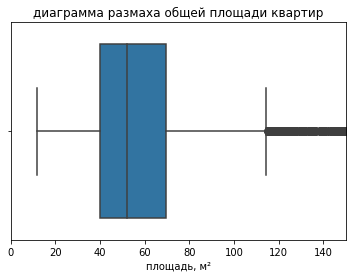

In [45]:
sns.boxplot(x=estate_data['total_area'])
plt.title('диаграмма размаха общей площади квартир')
plt.xlabel('площадь, м²')
plt.xlim(0, 150)

Выбросы начинаются после 110м², возможно это квартиры с большой площадью, но также можно предположить, что при заполнении значений был пропущен знак. Отсечём выбросы, соотнесем эти значения с общим количеством, чтобы понять, можем ли мы их не использовать:

In [46]:
estate_data[['total_area']].query('total_area > 115').describe()

,total_area
count,1209.000000
mean,169.826294
std,71.793263
min,115.100000
25%,127.000000
50%,147.300000
75%,181.300000
max,900.000000


Всего 1209 объявлений с метражом больше 115м². Посмотрим, сколько это в процентах, если менее 10%, то эти данные в расчетах мы опустим. 

In [47]:
estate_data[['total_area']].query('total_area > 115').count() / estate_data['total_area'].count() * 100

total_area    5.13049
dtype: float64

5.1% выбросов говорят о том, что их мы опустим и сохраним обновленную информацию в новой переменной `total_area_cut`:

In [48]:
total_area_cut = estate_data[['total_area']].query('total_area <= 115')

Посмотрим на обновленные данные:

(0.0, 120.0)

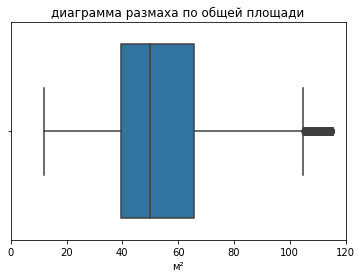

In [49]:
sns.boxplot(x=total_area_cut['total_area'])
plt.title('диаграмма размаха по общей площади')
plt.xlabel('м²')
plt.xlim(0, 120)

Основная часть выбросов отсуствует, осталось немного, но максимум их менее 120м², поэтому можно их оставить. В дальнейшем мы будем использовать эти данные для расчетов. 

#### Посмотрим, как обстоят дела с количеством комнат в квартирах.

Построим диаграмму размаха, в которой сможем посмотреть знать характерный разброс — то, какие значения по количеству комнат оказались вдали от среднего и насколько их много.

(0.0, 25.0)

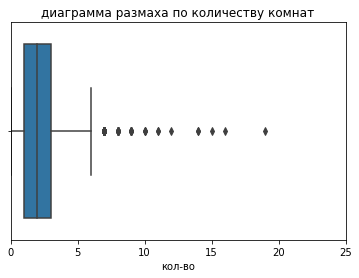

In [50]:
sns.boxplot(x=estate_data['rooms'])
plt.title('диаграмма размаха по количеству комнат')
plt.xlabel('кол-во')
plt.xlim(0, 25)

Опять есть выбросы, посмотрим, какой процент от общего числа объявлений они составляют. Отбросим значения с количеством комнать больше 6:

In [51]:
estate_data[['rooms']].query('rooms > 6').describe()

,rooms
count,90.000000
mean,8.033333
std,2.169503
min,7.000000
25%,7.000000
50%,7.000000
75%,8.000000
max,19.000000


Всего 90 объявлений. Убедимся, что мы можем отбросить эти значения (если их доля будет менее 10%)

In [52]:
estate_data[['rooms']].query('rooms > 6').count() / estate_data['rooms'].count() * 100

rooms    0.381922
dtype: float64

Менее 1%. Отбросим выбивающиеся значения и сохраним обновленную информацию в новой переменной `rooms_cut`

In [53]:
rooms_cut = estate_data[['rooms']].query('rooms <= 6')

Посотрим график, чтобы посмотреть разброс значений:

(0.0, 10.0)

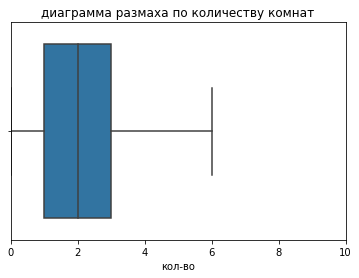

In [54]:
sns.boxplot(x=rooms_cut['rooms'])
plt.title('диаграмма размаха по количеству комнат')
plt.xlabel('кол-во')
plt.xlim(0, 10)

Выбивающихся значений нет, будем использовать эти данные, если они понадобятся для расчетов. 

#### Изучим информацию о жилой площади.

Посмотрим на диаграмму размаха по жилой площади в квартирах:

(0.0, 450.0)

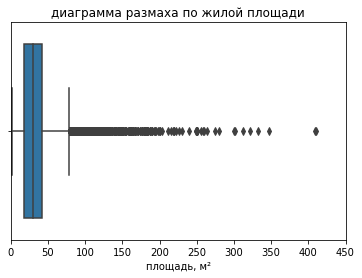

In [55]:
sns.boxplot(x=estate_data['living_area'])
plt.title('диаграмма размаха по жилой площади')
plt.xlabel('площадь, м²')
plt.xlim(0, 450)

Также можно наблюдать выбросы: межквартильный размах заканчивается в районе 80м², посмотрим на высокие значения жилой площади и общей.

In [56]:
estate_data[['living_area']].query('living_area > 80').describe()

,living_area
count,729.000000
mean,117.117716
std,43.861595
min,80.100000
25%,90.000000
50%,100.230000
75%,130.300000
max,409.700000


In [57]:
estate_data[['living_area']].query('living_area > 80').count() / estate_data['total_area'].count() * 100

living_area    3.093571
dtype: float64

Доля квартир c жилой площадью выше 80м² составляет 3%, поэтому мы можем опустить объявления о продаже с большим метражом. Сохраним в переменной `living_area_cut`:

In [58]:
living_area_cut = estate_data.query('living_area < 80')

Посмотрим на разброс значений жилой площади после того, как отсекли большие значения:

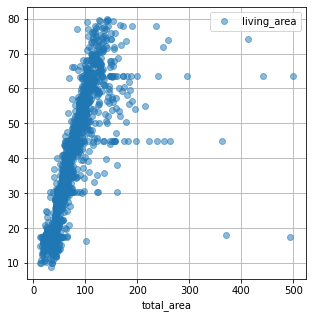

In [59]:
living_area_cut.pivot_table(
    index='total_area', values='living_area').plot(grid=True, style='o', figsize=(5, 5), alpha=0.5)
plt.show()

Жилая площадь коррелирует с показателями общей площади, можно заметить достаточно серьёзное увеличение показателей жилой площади, начиная приблизительно с 10м² до 80м² пропорционально к относительно небольшому росту общей площади. Здесь тоже есть выбросы, имеет смысл обратить внимание на показатели жилой площади в районе 18м² к 380м² и 495м² общей площади. Возможно стоит уточнить у риелтора, нет ли опечатки (0 может быть лишним).

Также имеет смысл вынести в отдельный датафрейм характеристики объявлений с большой площадью, которые мы отсекли, т.к. это уже больше тянет на элитную недвижимость. 

#### Посмотрим на площадь кухни

In [60]:
estate_data['kitchen_area'].describe().to_frame()

,kitchen_area
count,23565.000000
mean,10.439605
std,5.664061
min,1.300000
25%,7.000000
50%,9.000000
75%,12.000000
max,112.000000


В описании к столбцу мы видим, что минимальная площадь кухни равна 1.3 метра. Это очень мало. Посмотрим нормативные документы. Согласно СНиП 31-01-2003 "Здания жилые многоквартирные" пп 5.7: Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м.

Исходя из написанного выше отбросим все значения меньше 5 метров, все значения больше оставим, т.к. у нас есть квартиры с большой общей площадью и сохраним в новой переменной `kitchen_area_snip`, но сначала посмотрим, как много у нас значений с маленькой кухней, чтобы понимать, что смело можно отбросить эти данные. 

In [61]:
estate_data[['kitchen_area']].query('kitchen_area < 5').describe()

,kitchen_area
count,104.000000
mean,4.000865
std,0.855434
min,1.300000
25%,3.800000
50%,4.000000
75%,4.700000
max,4.900000


Всего 104 значения меньше 5 метров из нашего датасета. Посмотрим, сколько это в процентном соотношении, если выбросов более 10%, то просто их отсечь будет уже нельзя, чтобы не получить искажений в данных. 

In [62]:
estate_data[['kitchen_area']].query('kitchen_area < 5').count() / estate_data['kitchen_area'].count() * 100

kitchen_area    0.441332
dtype: float64

Кухонь с маленьким метражом менее одного процента, поэтому смело отбрасываем минимальные значения:

In [63]:
kitchen_area_snip = estate_data.query('kitchen_area >= 5')

Посмотрим на диаграмму размаха по площади кухни в квартирах:

(0.0, 120.0)

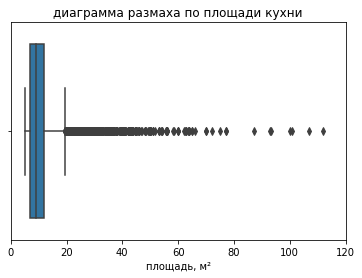

In [64]:
sns.boxplot(x=kitchen_area_snip['kitchen_area'])
plt.title('диаграмма размаха по площади кухни')
plt.xlabel('площадь, м²')
plt.xlim(0, 120)

Выбросы начинаются после 20м². Посмотрим, как высокие значения площади кухни коррелируют с общей площадью.

In [65]:
kitchen_area_snip[['total_area', 'kitchen_area']].sort_values(by='kitchen_area', ascending=False)[:30]

,total_area,kitchen_area
19540,900.0,112.0
20215,249.7,107.0
2489,255.0,100.7
5358,590.0,100.0
16239,181.1,93.2
16797,146.0,93.0
10867,177.9,87.2
4394,174.0,77.0
492,216.0,77.0
14644,150.0,75.0


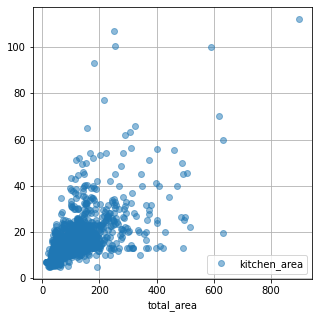

In [66]:
(
    kitchen_area_snip.pivot_table(index='total_area', values='kitchen_area')
    .plot(grid=True, style='o', figsize=(5, 5), alpha=0.5)
)
plt.show()

Очень интересно - оказывается, что общая площадь не всегда коррелирует с площадью кухни, если обратить внимание на цифры, но всё равно общая тенденция линейной взаимосвязи площади кухни и общей площади прослеживается. 

### Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Посмотрим общую картину корреляции по следующим характеристиками:
* стоимость квартиры
* общая площадь
* число комнат
* удалённость от центра
* группы этажности - первый, последний, другой (т.к. в группе качественные значения, мы возьмем колонку с этажами, там количественные)
* день, месяц и год даты размещения

Для корреляции Пирсона значения, близкие или равные 1, означают тесную линейную взаимосвязь.

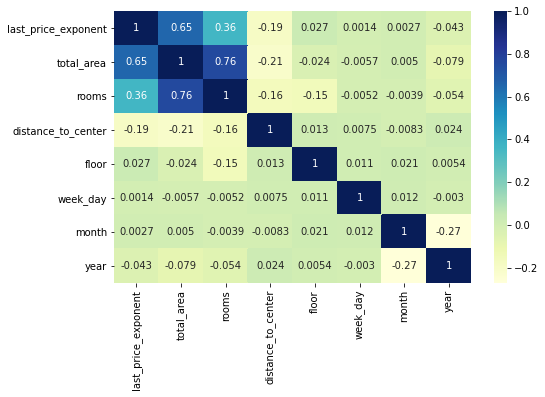

,last_price_exponent,total_area,rooms,distance_to_center,floor,week_day,month,year
last_price_exponent,1.000000,0.653621,0.363191,-0.190604,0.026842,0.001357,0.002726,-0.042864
total_area,0.653621,1.000000,0.758735,-0.210361,-0.024368,-0.005680,0.004961,-0.079041
rooms,0.363191,0.758735,1.000000,-0.160478,-0.151341,-0.005207,-0.003916,-0.054492
distance_to_center,-0.190604,-0.210361,-0.160478,1.000000,0.012902,0.007515,-0.008296,0.023811
floor,0.026842,-0.024368,-0.151341,0.012902,1.000000,0.011017,0.020736,0.005404
week_day,0.001357,-0.005680,-0.005207,0.007515,0.011017,1.000000,0.012019,-0.002985
month,0.002726,0.004961,-0.003916,-0.008296,0.020736,0.012019,1.000000,-0.271567
year,-0.042864,-0.079041,-0.054492,0.023811,0.005404,-0.002985,-0.271567,1.000000


In [67]:
estate_corr = ['last_price_exponent', 'total_area', 'rooms', 'distance_to_center', 'floor', 'week_day', 'month', 'year']
plt.figure(figsize=(8,5))
sns.heatmap(estate_data[estate_corr].corr(), annot = True, cmap="YlGnBu")
plt.show()
estate_data[estate_corr].corr()

Можно видеть, что есть тесная корреляция у цены с общей площадью и количеством комнат в квартире. То есть, есть взаимосвязь цены с метражом квартиры и количеством комнат: чем больше - тем выше цена

**Отдельно посмотрим, есть ли зависимость цены квартиры от группы этажности, к которой она относится. Сравним медианные значения за квадратный метр по разным категориям этажности:**

In [68]:
floor_price_cat = estate_data.pivot_table(
    index='floor_number', values='price_per_meter', aggfunc=['median','count']
)
floor_price_cat.columns = ['median','count']
floor_price_cat.sort_values('median', ascending=False).head(10)


,median,count
floor_number,,
другой,98288.07,17326
последний,87763.15,3330
первый,81250.00,2909


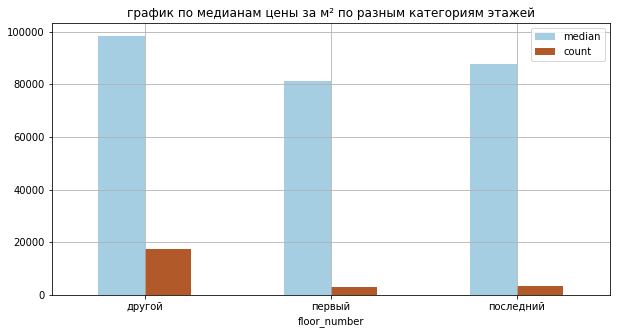

In [69]:
floor_price_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Paired');
plt.title('график по медианам цены за м² по разным категориям этажей')
plt.xticks(rotation=0); 

Согласно графику можно видеть, что самая высокая стоимость квартир и самое большое количествно предложений на других этажах, самые недорогие квартиры продаются на первом этаже, но предложений о продаже меньше всего. На последних этажах квартиры продаются чуть дороже, чем на первых, но предложений также меньше. 

**Посмотрим зависимость стоимости квартиры за м² и общие продажи по дням недели:**

In [70]:
day_price_cat = estate_data.pivot_table(
    index='week_day', values='price_per_meter', aggfunc=['median','count']
)
day_price_cat.columns = ['median','count']
day_price_cat.sort_values('median', ascending=False).head(10)

,median,count
week_day,,
1,95567.640,4163
2,95473.810,3948
3,95132.915,4276
0,94719.935,3596
6,94594.590,1683
4,94579.895,3980
5,93548.390,1919


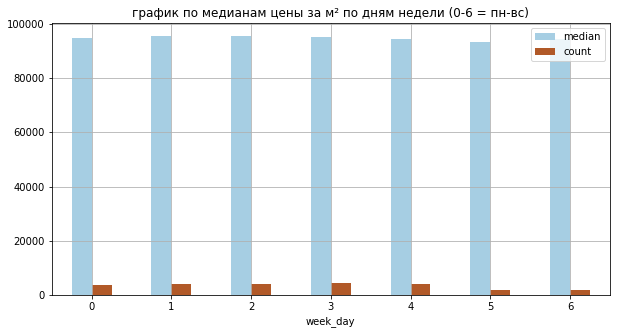

In [71]:
day_price_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Paired');
plt.title('график по медианам цены за м² по дням недели (0-6 = пн-вс)')
plt.xticks(rotation=0); 

Можно заметить, что в будние недели продаются более дорогие квартиры (в пересчете на стоимость за м²), также продается больше всего квартир количественно. 

**Посмотрим зависимость стоимости квартиры за м² и общие продажи по месяцам в году:**

In [72]:
month_price_cat = estate_data.pivot_table(
    index='month', values='price_per_meter', aggfunc=['median','count']
)
month_price_cat.columns = ['median','count']
month_price_cat.sort_values('median', ascending=False).head(10)

,median,count
month,,
4,96543.70,2356
8,96052.63,1739
9,95623.54,1972
11,95606.62,2360
3,95233.27,2575
1,95180.72,1487
7,95005.94,1686
2,95000.00,2636
12,94238.40,1638


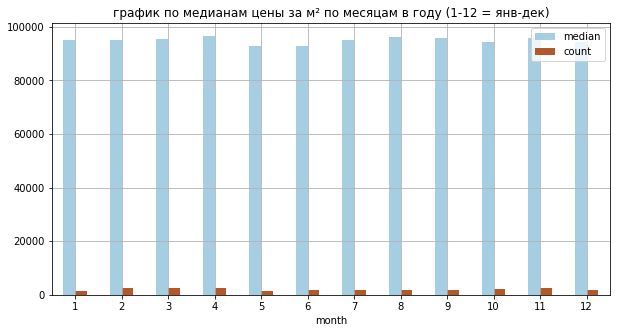

In [73]:
month_price_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Paired');
plt.title('график по медианам цены за м² по месяцам в году (1-12 = янв-дек)')
plt.xticks(rotation=0); 

В графике можно наблюдать повышение цены за м², а также и увеличение продаж с февраля по апрель и с июля по сентября, а также ноябрь. То есть, если потенциальный покупатель хочет немного сэкономить, то стоит обратить внимание на поиск недвижимости в мае-июне, октябре и январе. Но количество предложений может быть не столь разнообразным, как в пиковые месяцы. 

**Посмотрим зависимость стоимости квартиры за м² и общие продажи в разные годы:**

In [74]:
year_price_cat = estate_data.pivot_table(
    index='year', values='price_per_meter', aggfunc=['median','count']
)
year_price_cat.columns = ['median','count']
year_price_cat.sort_values('median', ascending=False).head(10)

,median,count
year,,
2014,106901.90,136
2019,103199.17,2871
2018,95696.35,8486
2015,93364.78,1166
2017,92569.66,8161
2016,91743.12,2745


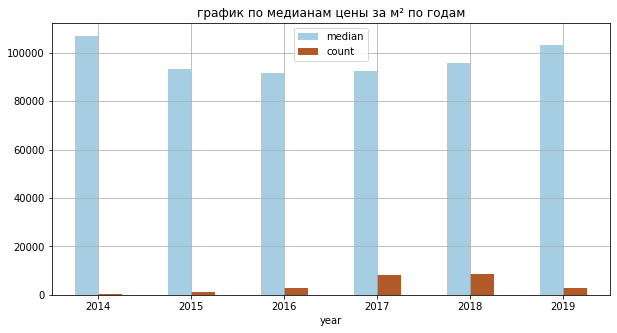

In [75]:
year_price_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Paired');
plt.title('график по медианам цены за м² по годам')
plt.xticks(rotation=0); 

Согласно нашим данным самые пиковые годы по продажам 2017 и 2018 год, это можно соотнести с более дешевой стоимость за м². Например, в 2014 году продажи шли не очень хорошо, возможно покупателей смущала достаточно высокая цена за м². Пик продаж пришелся на 2017 и 2018 год, т.к. в это время в Санкт-Петербурге активно шла застройка спальных районов относительно недорогой недвижимостью. Также можно видеть спад в 2019 году, т.к. произошел резкий скачок цен на недвижимость и поменялись условия расчетов дольщиков с девелоперами (ввели эскроу-счета). 

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

Эти данные можно найти по имени в столбце `locality_name`

In [76]:
for i in estate_data['locality_name']:
    if "поселок" in i:
        estate_data = estate_data.replace(i, 'посёлок')

In [77]:
for i in estate_data['locality_name']:
    if "Мурино" in i:
        estate_data = estate_data.replace(i, 'Мурино')

In [78]:
for i in estate_data['locality_name']:
    if "Кудрово" in i:
        estate_data = estate_data.replace(i, 'Кудрово')

In [79]:
locality_median = estate_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['median'])
locality_median.columns = ['цена за м²']
locality_median.sort_values('цена за м²', ascending=False)[:10]

,цена за м²
locality_name,
посёлок Лисий Нос,121616.225
Санкт-Петербург,104774.540
Зеленогорск,101666.665
Пушкин,100000.000
Сестрорецк,99678.460
посёлок Левашово,96997.690
Кудрово,95555.315
посёлок Парголово,91642.860
деревня Мистолово,90888.890


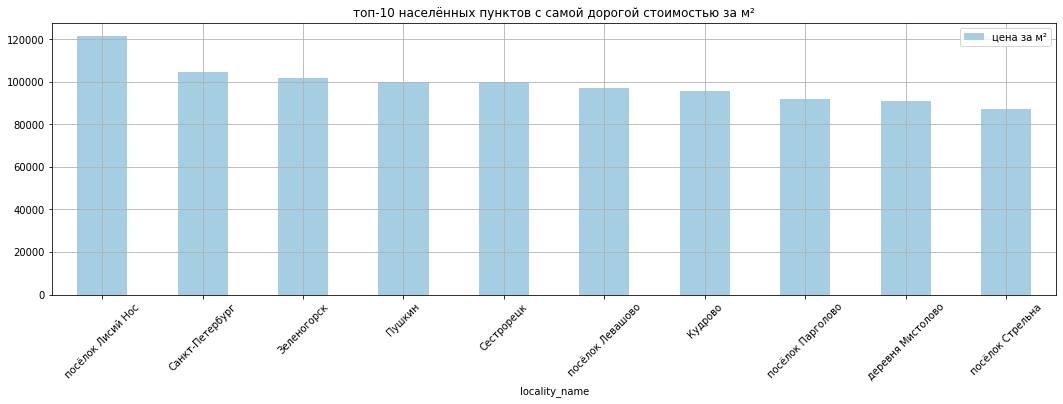

In [83]:
locality_median.sort_values('цена за м²', ascending=False)[:10].plot(
    kind = 'bar',figsize = (18,5),grid=True, colormap='Paired')
plt.title('топ-10 населённых пунктов с самой дорогой стоимостью за м²')
plt.xticks(rotation=45); 

Согласно нашей таблице, самая высокая стоимость жилья  у нас в посёлке Лисий Нос, что неудивительно, дом там может себе позволить далеко не каждый, дальше идут Санкт-Петербург, Зеленогорск и Пушкин, а дальше по убывающей все прилегающие к городу спальные районы. Теперь посмотрим, в каких населённых пунктах стоимость жилья самая низкая. 

In [81]:
locality_median.sort_values('цена за м²')[:10]

,цена за м²
locality_name,
деревня Старополье,11000.000
посёлок станции Свирь,11481.480
деревня Вахнова Кара,11688.310
деревня Выскатка,12335.480
деревня Малая Романовка,12724.550
деревня Сижно,13709.680
деревня Ям-Тесово,13711.555
деревня Чудской Бор,16286.640
деревня Фалилеево,16374.105


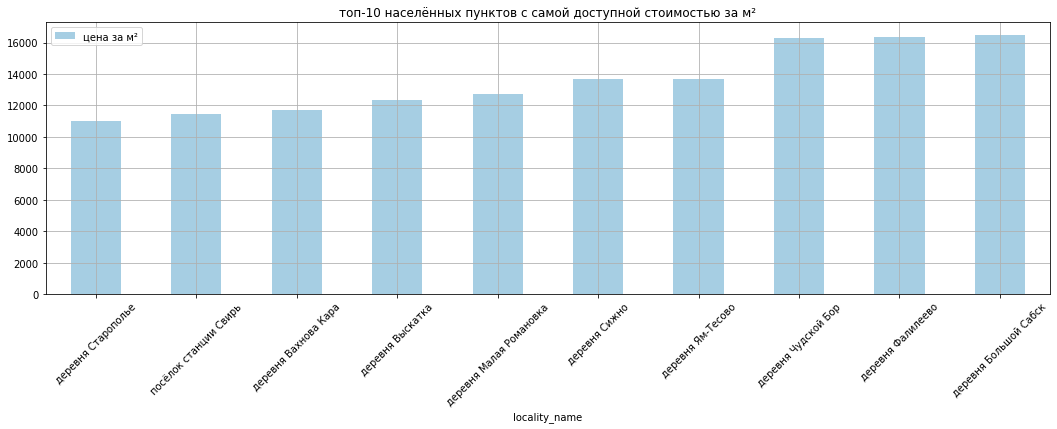

In [84]:
locality_median.sort_values('цена за м²')[:10].plot(
    kind = 'bar',figsize = (18,5),grid=True, colormap='Paired')
plt.title('топ-10 населённых пунктов с самой доступной стоимостью за м²')
plt.xticks(rotation=45); 

Очень интересные названия населённых пунктов, и очень низкая стоимость недвижимости. Лидер - деревня Ставрополье, находится в Сланцевском районе Ленинградской области, в 170 км от Санкт-Петербурга. 

### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Выясним, какая область входит в центр. 

Создадим столбец с расстоянием до центра в километрах и округлим до целых значений. 

In [ ]:
estate_data['distance_to_km'] = estate_data['distance_to_center'] / 1000
estate_data['distance_to_km'].astype('int')[:5].to_frame()

Добавили столбец и округлил значения до целого. Теперь среднюю цену для каждого километра и построим график: он покажет нам, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
center_area_table = estate_data.query(
    'locality_name == "Санкт-Петербург" and distance_to_km !=999999'
    ).pivot_table(
        index = 'distance_to_km', 
        values = 'price_per_meter', 
        aggfunc = 'mean')

center_area_table.plot()

Самые высокие значения стоимости квадратного метра от 0 до 8 километров, соответственно, центром города будет удалённость до 8 километров.

### Выделите сегмент квартир в центре. Проанализируем эту территорию.

Отсортируем данные нашего датасета - удаленность до центра должна быть меньше или равна 8 км. Сохраним эти данные в новую переменную `center_segment`

In [ ]:
center_segment = estate_data.query('distance_to_km <= 8')
center_segment.sort_values(by = 'distance_to_km')[:5]

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Посмотрим, как отличаются параметры квартир в центре от общих по нашему датасету. Для этого построим гистограммы, в которых сравним обшую выборку в центре по следующим характеристикам:
* общая площадь
* общая стоимость
* количество комнат
* высота потолков

Будем использовать данные без выбросов из пункта 5.3

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.hist(total_area_cut['total_area'], bins=50, range=(0,300), color='g')
plt.xlabel('м²')
plt.ylabel('количество объявлений')
plt.title('площадь, м²')

plt.hist(center_segment['total_area'], bins=50, range=(0,300), color='y')
plt.xlabel('м²')
plt.ylabel('количество объявлений')
plt.title('площадь, м²')


plt.subplot(2, 2, 2)

plt.hist(estate_data['last_price_exponent'], bins=50, range=(0,30), color='g')
plt.ylabel('количество объявлений')
plt.xlabel('млн руб.')
plt.title('цена, млн руб.')

plt.hist(center_segment['last_price_exponent'], bins=50, range=(0,30), color='y')
plt.ylabel('количество объявлений')
plt.xlabel('млн руб.')
plt.title('цена, млн руб.')



plt.subplot(2, 2, 3)

plt.hist(rooms_cut['rooms'], bins=10, range=(0,10), color='g')
plt.ylabel('количество объявлений')
plt.xlabel('количество комнат в квартире')
plt.title('комнаты')

plt.hist(center_segment['rooms'], bins=10, range=(0,10), color='y')
plt.ylabel('количество объявлений')
plt.xlabel('количество комнат в квартире')
plt.title('комнаты')



plt.subplot(2, 2, 4)

plt.hist(estate_data['ceiling_height'], bins=20, range=(0,20), color='g')
plt.ylabel('количество объявлений')
plt.xlabel('высота потолков, м')
plt.title('высота потолков')   

plt.hist(center_segment['ceiling_height'], bins=20, range=(0,20), color='y') 
plt.ylabel('Количество')
plt.xlabel('высота потолков, м')
plt.title('высота потолков')    

plt.show()

Согласно данным наших графиков, можно заметить, что количество объявлений о продаже квартир в центре в целом в меньшинстве. По всем параметрам значения не выбиваются из общей картины, кроме цены, минимальная стоимость начинается в районе 2.5 млн.рублей. 

#### Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Посмотрим, отличаются ли они от общих выводов по всей базе?

Нарисуем тепловую карту, в которой можно посмотреть коэффициенты корреляции перечисленных выше показателей со стоимостью квартиры:

In [ ]:
center_estate_corr = ['last_price_exponent', 'rooms', 'floor', 'distance_to_km', 'days_exposition']
plt.figure(figsize=(8,5))
sns.heatmap(center_segment[center_estate_corr].corr(), annot = True, cmap="YlGnBu")
plt.show()
center_segment[center_estate_corr].corr()

По данным в тепловой карте можно сказать, что нет определённой зависимости между параметрами. Единственное, что можно ответить, что коэффициенты корреляции 0.33 и 0.25 в количестве комнат и этаже соответственно говорит о наличии связи, однако не слишком сильной, то есть, чем больше комнат в квартире и этаж, тем дороже недвижимость, но только в 33% и 25% случаев. 

**Посмотрим стоимость квартир по категориям этажа**

In [ ]:
total_price_cat = estate_data.pivot_table(
    index='floor_number', values='last_price_exponent', aggfunc=['mean', 'count']
)
total_price_cat.columns = ['mean', 'count']
total_price_cat.sort_values('max_price', ascending=False).head(10)

In [ ]:
total_price_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='copper');
plt.title('график максимальных цен по разным категориям этажей')
plt.xticks(rotation=0); 

По графику видно, что на последних этажах есть дорогие квартиры (такая цена также может быть обусловлена наличием мансарды, например), но больше всего предложений все равно на других этажах. 

**Посмотрим стоимость квартир по годам.**

In [ ]:
total_price_year_cat = estate_data.pivot_table(
    index='year', values='last_price_exponent', aggfunc=['median']
)
total_price_year_cat.columns = ['median']
total_price_year_cat.sort_values('median', ascending=False)

In [ ]:
total_price_year_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Pastel1');
plt.title('график по медианам цен по годам в млн.руб.')
plt.xticks(rotation=0); 

Как и в случае с ценой за м² в 2014 было самым высоким, медианные значения общей стоимости квартиры за 2014 год выше всех остальных. Далее идет спад, с 2016 по 2018 цены на квартиры существенно не росли, рост можно наблюдать с 2019 (продолжается до сих пор)

**Посмотрим стоимость квартир по месяцам в году.**

In [ ]:
total_price_month_cat = estate_data.pivot_table(
    index='month', values='last_price_exponent', aggfunc=['median']
)
total_price_month_cat.columns = ['median']
total_price_month_cat.sort_values('median', ascending=False)

In [ ]:
total_price_month_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Pastel1', legend=False)
plt.title('график по медианам цен по месяцам в млн.руб.')
plt.xticks(rotation=0); 

Критического разброса мы не наблюдаем, есть явные подъемы в стоимости в апреле, сентябре и ноябре-декабре. Проседает в июне. 

**Посмотрим стоимость квартир по дням недели.**

In [ ]:
total_price_day_cat = estate_data.pivot_table(
    index='week_day', values='last_price_exponent', aggfunc=['median']
)
total_price_day_cat.columns = ['median']
total_price_day_cat.sort_values('median', ascending=False)

In [ ]:
total_price_day_cat.plot(kind = 'bar',figsize = (10,5),grid=True, colormap='Pastel1', legend=False)
plt.title('график по медианам цен по дням недели в млн.руб., 0-6=пн-вс')
plt.xticks(rotation=0); 

Квартиры по чуть более высокой цене продаются со вторника по четверг, но какой-то выраженной взаимосвязи с днями недели не наблюдается.  

## Общий вывод

В данном исследовании был исследован массив данных с объявлениями о продаже квартир в Санкт-Петербурге и пригороде. В процессе предобработки данных были найдены пропуски и дубликаты - они были заполнены релевантными значениями. 

В ходе исследования были рассчитаны различные показатели, характеризующие стоимость недвижимости, изучены закономерности распределения значений, проведена оценка влияния различных факторов на стоимость квартир и определена граница центра города. В процессе анализа данных выявлено, что на общая площадь, число комнат, расстояние до центра и этаж в большинстве случаев влияют на стоимость квартиры, но в случае с расстоянием до центра и числом комнат зависимость является линейной только в определенном диапазоне значений. Больше всего на цену квартиры влияет ее площадь. Характеристики, влияющие на стоимость квартир в центре и за его пределами, совпадают.

Также мы проделали работу по ряду пунктов:

**1. Изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра:**

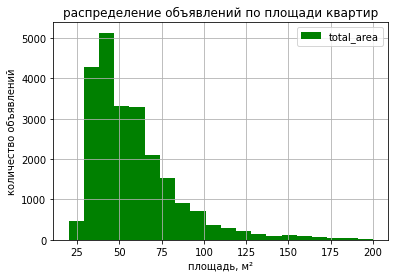

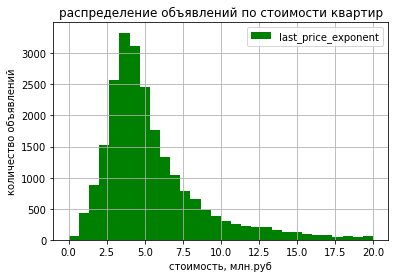

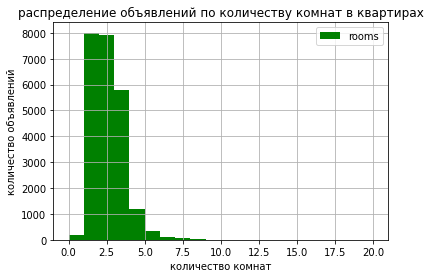

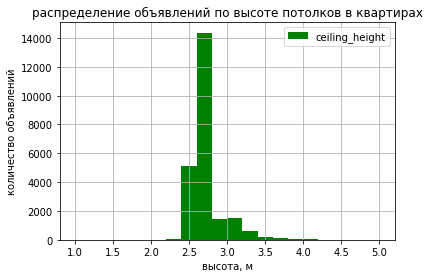


Можно сделать вывод, что все вышеперечисленные характеристики в целом поддаются нормальному распределению.

**2. Изучили время продажи квартиры. Построили гистограммы. Посчитали среднее и медиану. Описали, сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго.**

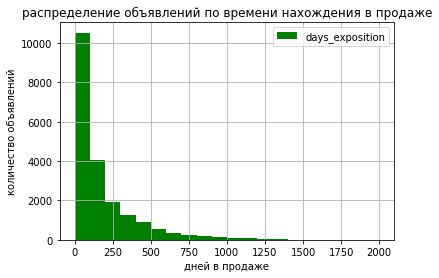

Согласно гистограмме мы видим, что в основном квартиры продаются достаточно быстро - в течение первых 3х-5ти месяцев от начала публикации. Средняя длительность проджи в районе 6-8 месяцев, всё что дольше - уже нужно смотреть адресно, что можно изменить, добавить в объявлении либо в характеристиках самой недвижимости для быстрой продажи. 

В среднем продажа недвижимости занимает 156 дней (около 5 месяцев) против медианного значения в 73 дня (достаточно быстро). Разница между среднем и медианным значениями достаточно большая, что говорит о выбросах значений. В описании мы можем видеть максимальное значение, равное 1580. Это без малого 4 года. 

**3. Убрали редкие и выбивающиеся значения и обнаружили некоторые особенности.**

Отсекли выбросы и сохранили обновленные данные в новых переменных.
Нашли откровенно низкое значение - 12190 за 109 кв.м. при не такой уж и сильной удаленности от центра - вероятнее всего здесь указаны млн.руб. В остальных значениях есть вероятность того, что забыли дописать один ноль - исходя из удаленности от центра - она везде равна, предположу, что это новый ЖК в спальном районе.

**4. Узнали, какие факторы больше всего влияют на стоимость квартиры.**

* число комнат
* этаж
* удалённость от центра

Также посмотрели дополнительные параметры, которые тоже могут быть важны для некоторых покупателей:

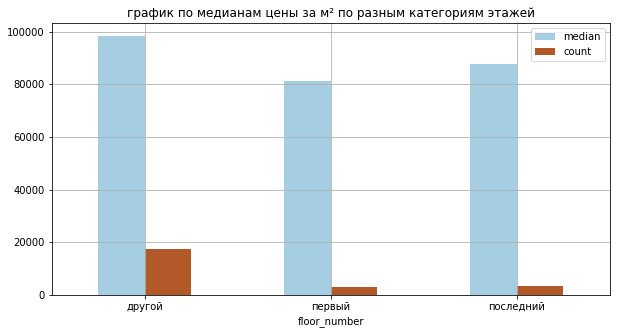
Согласно графику можно видеть, что самая высокая стоимость квартир и самое большое количествно предложений на других этажах, самые недорогие квартиры продаются на первом этаже, но предложений о продаже меньше всего. На последних этажах квартиры продаются чуть дороже, чем на первых, но предложений также меньше.

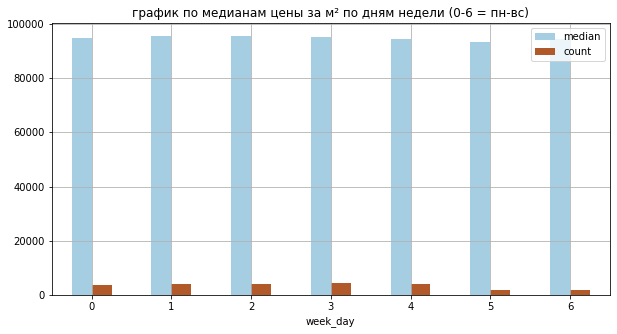
Можно заметить, что в будние недели продаются более дорогие квартиры (в пересчете на стоимость за м²), также продается больше всего квартир количественно.

**5. Выяснили, где дороже и дешевле всего стоит м² жилья.**

Самая высокая стоимость жилья у нас в посёлке Лисий Нос, что неудивительно, дом там может себе позволить далеко не каждый, дальше идут Санкт-Петербург, Зеленогорск и Пушкин, а дальше по убывающей все прилегающие к городу спальные районы. 

Самая низкая - деревня Ставрополье, находится в Сланцевском районе Ленинградской области, в 170 км от Санкт-Петербурга.

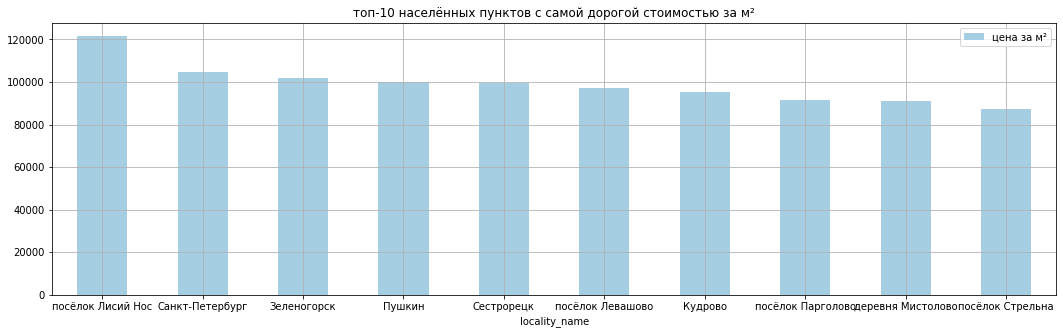
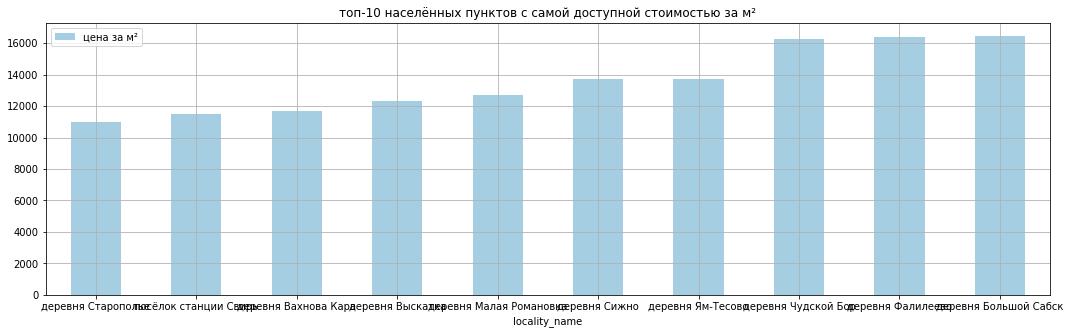

**6. Выяснили протяженность центра в километрах.**
Самые высокие значения стоимости квадратного метра от 0 до 8 километров, соответственно, центром города будет удалённость до 8 километров.

**7. Выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)**

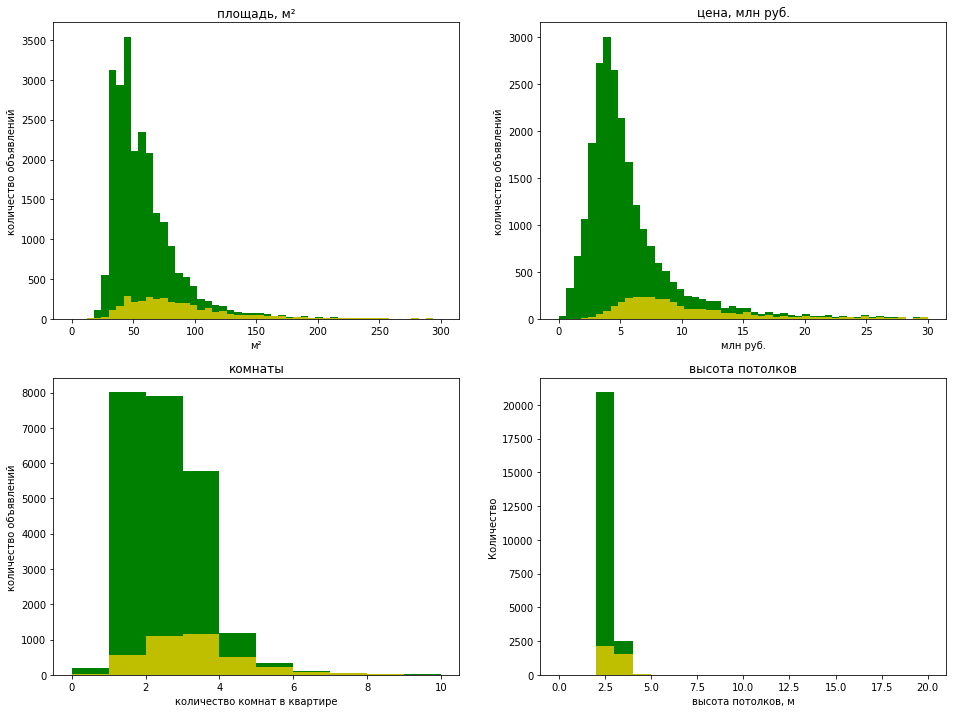

Количество объявлений о продаже квартир в центре в целом в меньшинстве. По всем параметрам значения не выбиваются из общей картины, кроме цены, минимальная стоимость начинается в районе 2.5 млн.рублей.

**8. Посмотрели зависимость цены за м² и общей стоимости квартир по месяцам, дням недели и годам**

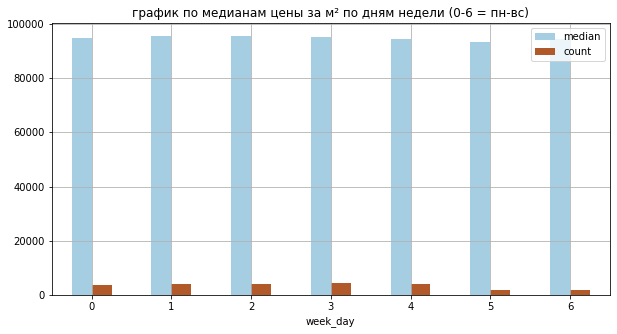
Можно заметить, что в будние недели продаются более дорогие квартиры (в пересчете на стоимость за м²), также продается больше всего квартир количественно.

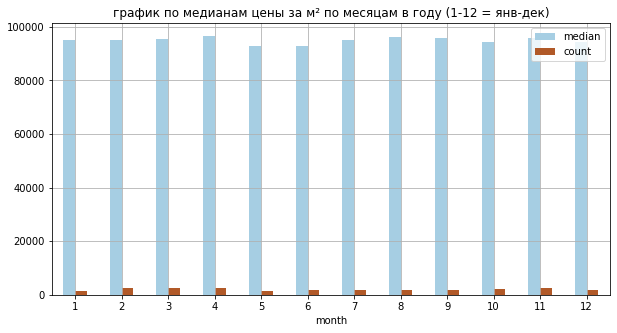
В графике можно наблюдать повышение цены за м², а также и увеличение продаж с февраля по апрель и с июля по сентября, а также ноябрь. То есть, если потенциальный покупатель хочет немного сэкономить, то стоит обратить внимание на поиск недвижимости в мае-июне, октябре и январе. Но количество предложений может быть не столь разнообразным, как в пиковые месяцы.

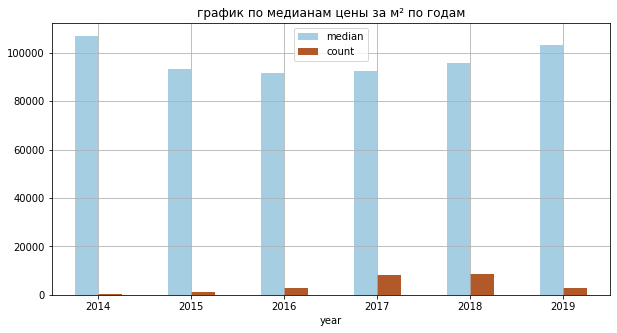
Согласно нашим данным самые пиковые годы по продажам 2017 и 2018 год, это можно соотнести с более дешевой стоимость за м². Например, в 2014 году продажи шли не очень хорошо, возможно покупателей смущала достаточно высокая цена за м². Пик продаж пришелся на 2017 и 2018 год, т.к. в это время в Санкт-Петербурге активно шла застройка спальных районов относительно недорогой недвижимостью. Также можно видеть спад в 2019 году, т.к. произошел резкий скачок цен на недвижимость и поменялись условия расчетов дольщиков с девелоперами (ввели эскроу-счета).

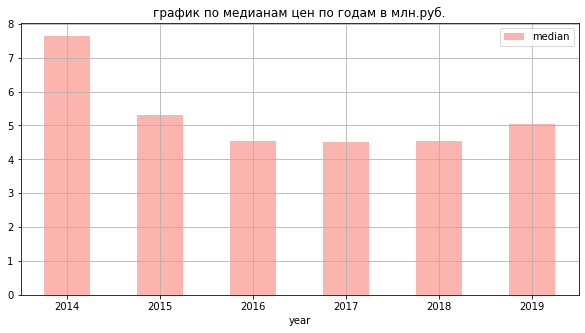
Как и в случае с ценой за м² в 2014 было самым высоким, медианные значения общей стоимости квартиры за 2014 год выше всех остальных. Далее идет спад, с 2016 по 2018 цены на квартиры существенно не росли, рост можно наблюдать с 2019 (продолжается до сих пор)

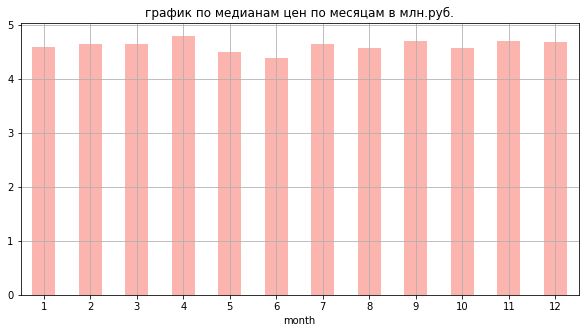
Критического разброса мы не наблюдаем, есть явные подъемы в стоимости в апреле, сентябре и ноябре-декабре. Проседает в июне.

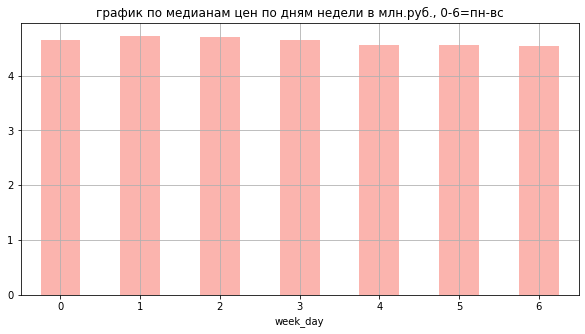
Квартиры по чуть более высокой цене продаются со вторника по четверг, но какой-то выраженной взаимосвязи с днями недели не наблюдается.

В целом, можно выделить основные характеристики, наличие которых необходимо контролировать в объявлениях, а также обращать (или наоборот, не обращать) внимание на них при показе недвижимости потенциальным покупателям:

* число комнат
* этаж
* удалённость от центра

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Построим-гистограммы-для-каждого-параметра." data-toc-modified-id="Изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Построим-гистограммы-для-каждого-параметра.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.</a></span></li><li><span><a href="#Изучим-время-продажи-квартиры.-Построим-гистограмму.-Посчитаем-среднее-и-медиану.-Опишем,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Изучим-время-продажи-квартиры.-Построим-гистограмму.-Посчитаем-среднее-и-медиану.-Опишем,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span></li><li><span><a href="#Уберём-редкие-и-выбивающиеся-значения-и-посмотрим,-какие-особенности-обнаружили." data-toc-modified-id="Уберём-редкие-и-выбивающиеся-значения-и-посмотрим,-какие-особенности-обнаружили.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберём редкие и выбивающиеся значения и посмотрим, какие особенности обнаружили.</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-обстоят-дела-со-стоимостью-квартир.-Ранее-мы-добавили-столбец,-в-котором-уменьшили-количество-нулей-в-цене,-используем-его,-чтобы-построить-диаграмму-размаха:" data-toc-modified-id="Посмотрим,-как-обстоят-дела-со-стоимостью-квартир.-Ранее-мы-добавили-столбец,-в-котором-уменьшили-количество-нулей-в-цене,-используем-его,-чтобы-построить-диаграмму-размаха:-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Посмотрим, как обстоят дела со стоимостью квартир. Ранее мы добавили столбец, в котором уменьшили количество нулей в цене, используем его, чтобы построить диаграмму размаха:</a></span></li><li><span><a href="#Теперь-поработаем-с-общей-площадью-квартир." data-toc-modified-id="Теперь-поработаем-с-общей-площадью-квартир.-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Теперь поработаем с общей площадью квартир.</a></span></li><li><span><a href="#Посмотрим,-как-обстоят-дела-с-количеством-комнат-в-квартирах." data-toc-modified-id="Посмотрим,-как-обстоят-дела-с-количеством-комнат-в-квартирах.-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Посмотрим, как обстоят дела с количеством комнат в квартирах.</a></span></li><li><span><a href="#Изучим-информацию-о-жилой-площади." data-toc-modified-id="Изучим-информацию-о-жилой-площади.-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Изучим информацию о жилой площади.</a></span></li><li><span><a href="#Посмотрим-на-площадь-кухни" data-toc-modified-id="Посмотрим-на-площадь-кухни-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Посмотрим на площадь кухни</a></span></li></ul></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучим,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучим-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучим-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучим,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучим-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучим-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.</a></span></li><li><span><a href="#Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделим-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья." data-toc-modified-id="Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитаем-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделим-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.</a></span></li><li><span><a href="#Изучим-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделим-квартиры-в-Санкт-Петербурге-(locality_name).-Выясним,-какая-область-входит-в-центр." data-toc-modified-id="Изучим-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделим-квартиры-в-Санкт-Петербурге-(locality_name).-Выясним,-какая-область-входит-в-центр.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Выясним, какая область входит в центр.</a></span></li><li><span><a href="#Выделите-сегмент-квартир-в-центре.-Проанализируем-эту-территорию." data-toc-modified-id="Выделите-сегмент-квартир-в-центре.-Проанализируем-эту-территорию.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделите сегмент квартир в центре. Проанализируем эту территорию.</a></span><ul class="toc-item"><li><span><a href="#Изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Изучим-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Изучим следующие параметры: площадь, цена, число комнат, высота потолков.</a></span></li><li><span><a href="#Выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Посмотрим,-отличаются-ли-они-от-общих-выводов-по-всей-базе?" data-toc-modified-id="Выделим-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Посмотрим,-отличаются-ли-они-от-общих-выводов-по-всей-базе?-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Посмотрим, отличаются ли они от общих выводов по всей базе?</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>